## TechCore Easy

## Decision Tree

## Python Implementation



In [1]:
!pip install pydotplus

    100% |████████████████████████████████| 286kB 30.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Install Required Package

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
# Read The Input

input_df = pd.read_csv('Social Media Ad Data.csv')
input_df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
# Drop User Id Because It has no value

input_df = input_df.drop(['User ID'],  axis=1)
input_df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [5]:
# Feature Engineering

le = preprocessing.LabelEncoder()

input_df = input_df.apply(le.fit_transform)
input_df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,1,1,4,0
1,1,17,5,0
2,0,8,26,0
3,0,9,39,0
4,1,1,57,0
5,1,9,40,0
6,0,9,65,0
7,0,14,116,1
8,1,7,17,0
9,0,17,47,0


In [6]:
# Split data in Target in Features

X = input_df.drop(['Purchased'],  axis=1).values
y = input_df['Purchased'].values

In [7]:
# Split data in Training & Test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [13]:
# Initiate the object DecisionTreeClassifier #max_depth=5

decision_tree = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=5)


In [14]:
# Train the model

decision_tree_model = decision_tree.fit(X_train, y_train)

In [15]:

#Predict the response for test dataset

y_pred = decision_tree_model.predict(X_test)


In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375


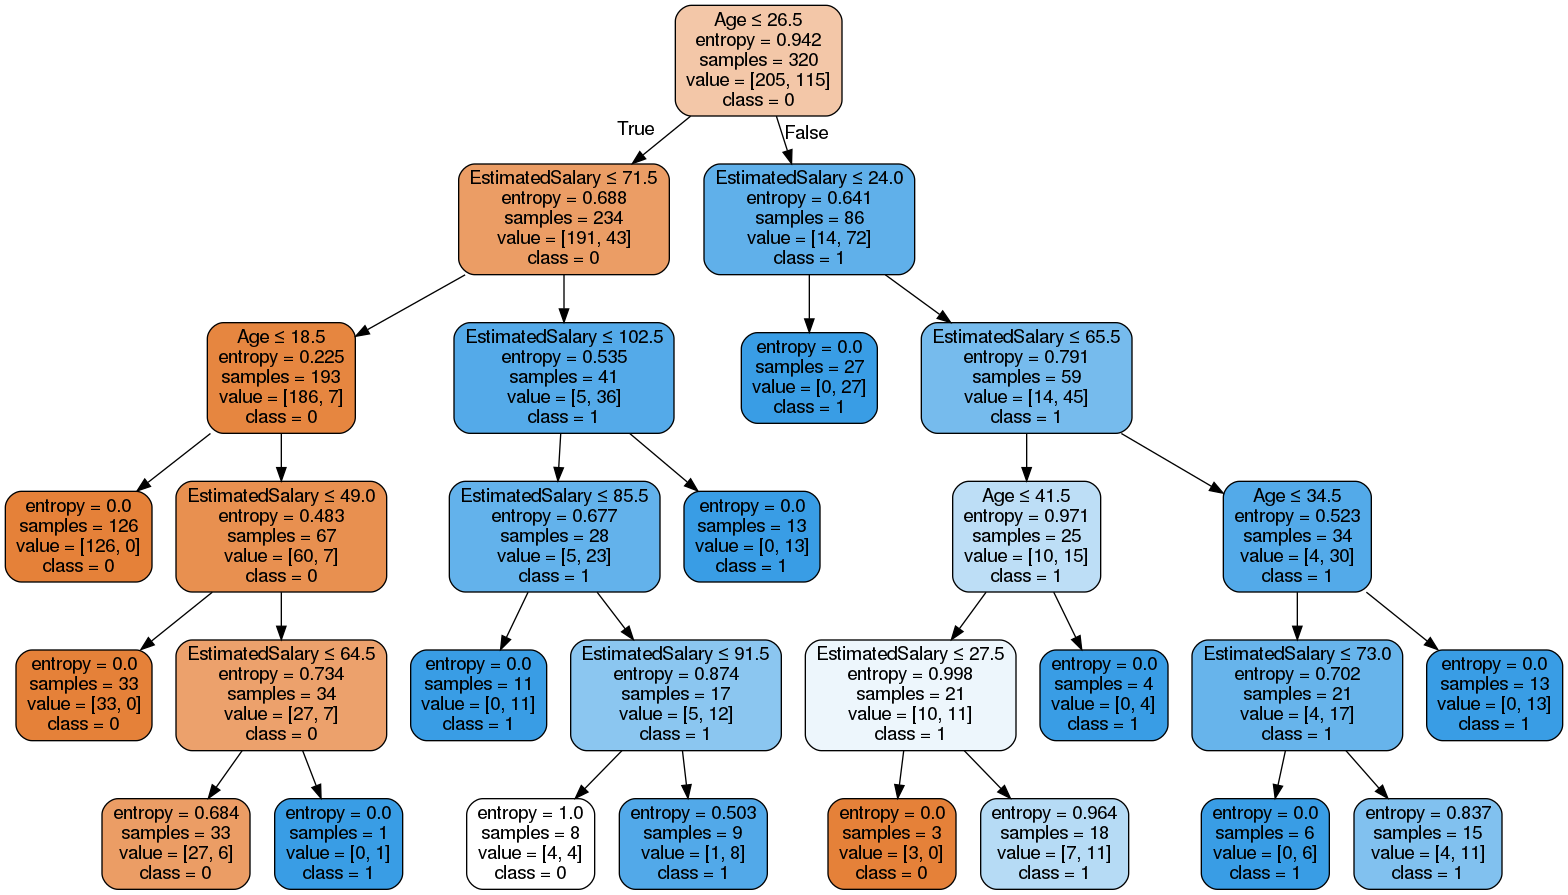

In [18]:
feature_cols = ['Gender', 'Age', 'EstimatedSalary']

dot_data = StringIO()

export_graphviz(decision_tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Social_Media_Ad_Data.png')

Image(graph.create_png())